In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('pima-indian-diabetes.csv', index_col=0)

In [3]:
data.head()

,148,72,35,0,33.6,0.627,50,1
6,,,,,,,,
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 1
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   148     767 non-null    int64  
 1   72      767 non-null    int64  
 2   35      767 non-null    int64  
 3   0       767 non-null    int64  
 4   33.6    767 non-null    float64
 5   0.627   767 non-null    float64
 6   50      767 non-null    int64  
 7   1       767 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.9 KB


In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.shape,y.shape

((767, 7), (767,))

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=30)

In [7]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((613, 7), (154, 7), (613,), (154,))

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report ,accuracy_score

In [9]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
model.fit(train_x,train_y)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [10]:
y_pre=model.predict(test_x)

In [11]:
recall_score(test_y, y_pre)

0.5172413793103449

In [12]:
precision_score(test_y, y_pre)

0.6122448979591837

In [13]:
cm=confusion_matrix(test_y, y_pre)
cm

array([[77, 19],
       [28, 30]], dtype=int64)

In [14]:
print(classification_report(test_y,y_pre))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        96
           1       0.61      0.52      0.56        58

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



In [15]:
import seaborn as sns

<AxesSubplot:>

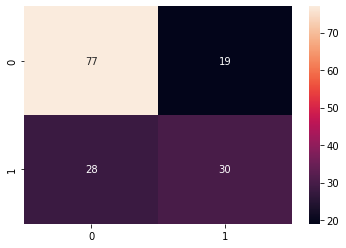

In [16]:
sns.heatmap(cm,annot=True )

# finding best base_estimator parameters

In [17]:
tree = DecisionTreeClassifier()
clf1 = GridSearchCV(tree,{'criterion':['gini','entropy'],'min_samples_split':[2,3,4],'max_depth':[2,3,4]}, cv =3)

In [18]:
clf1.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [19]:
clf1.best_estimator_

DecisionTreeClassifier(max_depth=2)

# finding the best hyperparameters for our Adaboost

In [20]:
model = AdaBoostClassifier(clf1.best_estimator_)
model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

In [21]:
n_estimators = [10,30,60,50,110,130]
learning_rate = [0.001,0.01,0.05,0.1,0.5]
algorithm = ['SAMME','SAMME.R']
params = dict(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm)
params

{'n_estimators': [10, 30, 60, 50, 110, 130],
 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
 'algorithm': ['SAMME', 'SAMME.R']}

In [22]:
clf = GridSearchCV(estimator=model,param_grid=params,cv=3)

In [23]:
clf.fit(train_x,train_y)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [10, 30, 60, 50, 110, 130]})

In [24]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=30)

In [25]:
clf_pre = clf.best_estimator_.predict(test_x)

In [26]:
round(recall_score(test_y,clf_pre),5)

0.62069

In [27]:
precision_score(test_y,clf_pre)

0.75

In [28]:
print(classification_report(test_y,clf_pre))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        96
           1       0.75      0.62      0.68        58

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.78      0.77       154



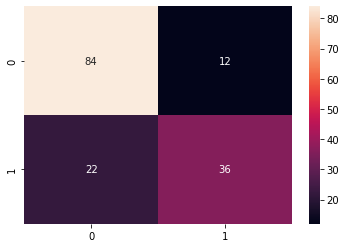

In [29]:
cm2 = confusion_matrix(test_y,clf_pre)

sns.heatmap(cm2,annot=True);

In [30]:
print(round(accuracy_score(train_y,clf.predict(train_x)),5))
print(round(accuracy_score(test_y,clf_pre),5))

0.80587
0.77922
